# JARVIS EDA

In [1]:
# Imports
import pandas as pd
from jarvis.db.figshare import data
import matplotlib.pyplot as plt
import seaborn as sns

### Checkpoint 1: Import 3D DFT Data from JARVIS and Pickel it


In [2]:
dft_data = data('dft_3d')
df = pd.DataFrame(dft_data)
df.to_pickle('jarvis_dft_3d.pkl')

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


- Features for semi-conductivity
    - `optb88vdw_bandgap`, `mbj_bandgap`, and `hse_gap` -> band gaps
    - `ehull` and `formation_energy_peratom` -> thermodynamic stability
    - `effective_masses_300K`, `avg_elec_mass`, `avg_hole_mass` -> electron mobility
    - `epsx`, `epsy`, `epsz` -> dielectric properties
     

In [3]:
features = df.columns.tolist()
print(features)

['jid', 'spg_number', 'spg_symbol', 'formula', 'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms', 'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor', 'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg', 'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij', 'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric', 'dfpt_piezo_max_dielectric_electronic', 'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode', 'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond', 'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality', 'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv', 'mbj_bandgap', 'hse_gap', 'reference', 'search']


### Checkpoint 2: Filter Out Semi-Conductors and Transparent Semi-conductors, then store as CSV 


In [4]:
def has_element(atoms_dict, element='O'):
    atoms = Atoms.from_dict(atoms_dict)
    return element in atoms.elements

def filter_semiconductors(df, band_gap_min = 0.1, band_gap_method = 'optb88vdw_bandgap'):
    df[band_gap_method] = pd.to_numeric(df[band_gap_method], errors='coerce')
    df['ehull'] = pd.to_numeric(df['ehull'], errors='coerce')
    df = df.dropna(subset=[band_gap_method, 'ehull'])
    df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
    semis = df[
        (df[band_gap_method] > band_gap_min) &
        (df['ehull'] <= 0.1) &
        (df['has_oxygen'] == True)
        ]
    return semis

In [5]:
import pandas as pd
import numpy as np
from jarvis.core.atoms import Atoms

# Read in pickled data
df = pd.read_pickle('jarvis_dft_3d.pkl')

# Filter Semi-Conductors Using 3 Different Bandgap Estimations
semis_vdw = filter_semiconductors(df, 0.1)
semis_mbj = filter_semiconductors(df, 0.1, "mbj_bandgap")
semis_hse = filter_semiconductors(df, 0.1, "hse_gap")

# Filter Transparent Semi-Conductors Using 3 Different Bandgap Estimations
transparent_semis_vdw = filter_semiconductors(df, 3.0)
transparent_semis_mbj = filter_semiconductors(df, 3.0, "mbj_bandgap")
transparent_semis_hse = filter_semiconductors(df, 3.0, "hse_gap")


semis_vdw.to_csv('semis_vdw.csv', index=False)
print(f"Saved {len(semis_vdw)} entries to semis_vdw.csv")
# semis_mbj.to_csv('semis_vdw.mbj', index=False)
semis_mbj.to_csv('semis_mbj.csv', index=False)
print(f"Saved {len(semis_mbj)} entries to semis_mbj.csv")
# semis_hse.to_csv('semis_vdw.hse', index=False)
semis_hse.to_csv('semis_hse.csv', index=False)
print(f"Saved {len(semis_hse)} entries to semis_hse.csv")

transparent_semis_vdw.to_csv('transparent_semis_vdw.csv', index=False)
print(f"Saved {len(transparent_semis_vdw)} entries to transparent_semis_vdw.csv")
transparent_semis_mbj.to_csv('transparent_semis_mbj.csv', index=False)
print(f"Saved {len(transparent_semis_mbj)} entries to transparent_semis_mbj.csv")
# transparent_semis_hse.to_csv('transparent_semis_mbj.hse', index=False)
transparent_semis_hse.to_csv('transparent_semis_hse.csv', index=False)
print(f"Saved {len(transparent_semis_hse)} entries to transparent_semis_hse.csv")

/var/folders/s8/2hb9crtx0f59zm5tv6jsyvhm0000gn/T/ipykernel_2002/3760232568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
/var/folders/s8/2hb9crtx0f59zm5tv6jsyvhm0000gn/T/ipykernel_2002/3760232568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
/var/folders/s8/2hb9crtx0f59zm5tv6jsyvhm0000gn/T/ipykernel_2002/3760232568.py:9: SettingWithCopyWarning: 
A value is tryin

Saved 8520 entries to semis_vdw.csv
Saved 2828 entries to semis_mbj.csv
Saved 12 entries to semis_hse.csv
Saved 3185 entries to transparent_semis_vdw.csv
Saved 1879 entries to transparent_semis_mbj.csv
Saved 10 entries to transparent_semis_hse.csv


In [6]:
# data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75993 entries, 0 to 75992
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   jid                                   75993 non-null  object 
 1   spg_number                            75993 non-null  object 
 2   spg_symbol                            75993 non-null  object 
 3   formula                               75993 non-null  object 
 4   formation_energy_peratom              75993 non-null  float64
 5   func                                  75993 non-null  object 
 6   optb88vdw_bandgap                     75993 non-null  float64
 7   atoms                                 75993 non-null  object 
 8   slme                                  75993 non-null  object 
 9   magmom_oszicar                        75993 non-null  object 
 10  spillage                              75993 non-null  object 
 11  elastic_tensor 

In [7]:
df.shape

(75993, 64)

In [8]:
# Summary statistic for numeric columns
df.describe()

,formation_energy_peratom,optb88vdw_bandgap,optb88vdw_total_energy,ehull,density,nat,mbj_bandgap,hse_gap
count,75993.000000,75993.000000,75993.000000,75993.000000,75993.000000,75993.000000,19805.000000,56.000000
mean,-0.819111,0.612557,-3.206939,0.215266,6.235318,10.176977,1.481616,3.654464
std,1.084498,1.343489,2.135206,0.433001,3.158882,8.730054,2.348576,2.057046
min,-4.423040,0.000000,-10.500270,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-1.553020,0.000000,-4.852750,0.000000,3.972000,4.000000,0.000000,1.615000
50%,-0.558820,0.000000,-3.265980,0.038300,5.647000,7.000000,0.000000,3.795000
75%,-0.094720,0.376000,-1.565740,0.209400,7.994000,14.000000,2.441000,5.362500
max,5.359670,18.179000,5.520640,6.251300,24.266000,140.000000,32.563000,7.400000


In [9]:
# check for missing values 
df.isnull().sum()

jid                             0
spg_number                      0
spg_symbol                      0
formula                         0
formation_energy_peratom        0
                            ...  
shear_modulus_gv                0
mbj_bandgap                 56188
hse_gap                     75937
reference                       0
search                          0
Length: 64, dtype: int64

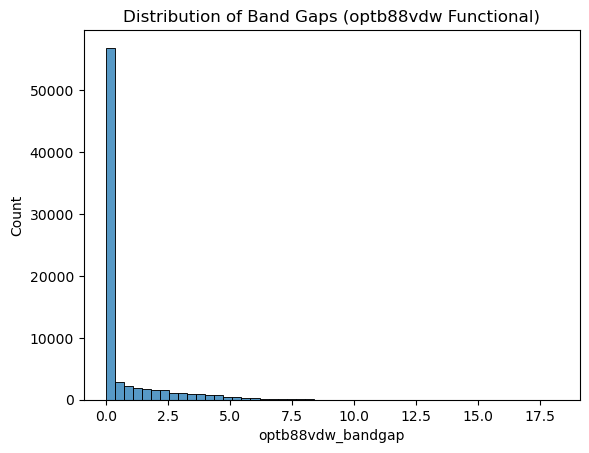

In [10]:
# plot distribution of bandgap calculated using the optb88vdw functional
sns.histplot(df['optb88vdw_bandgap'], bins=50)
plt.title('Distribution of Band Gaps (optb88vdw Functional)')
plt.show()

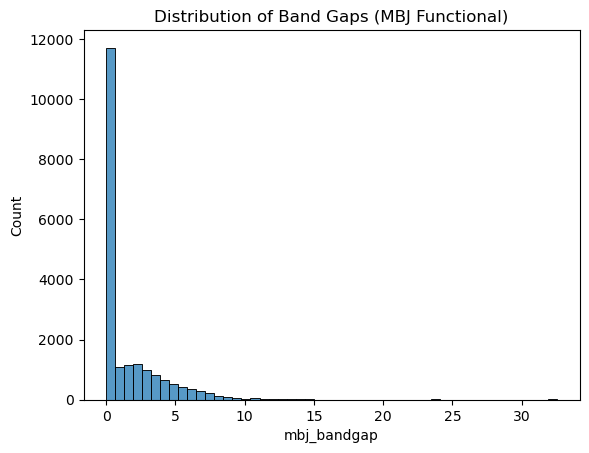

In [11]:
# plot distribution of bandgap calculated using the MBJ functional
sns.histplot(df['mbj_bandgap'], bins=50)
plt.title('Distribution of Band Gaps (MBJ Functional)')
plt.show()

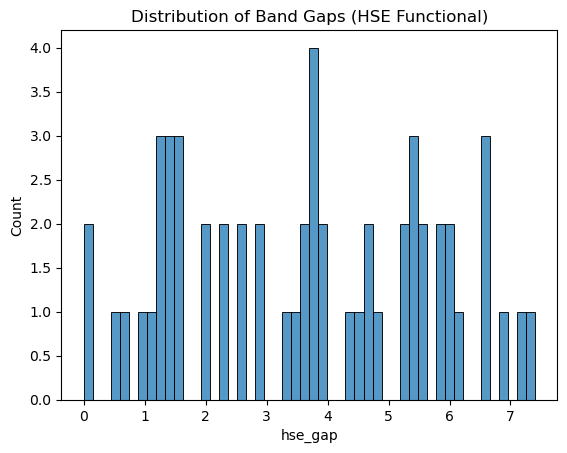

In [12]:
# plot distribution of bandgap calculated using the HSE functional
sns.histplot(df['hse_gap'].dropna(), bins=50)
plt.title('Distribution of Band Gaps (HSE Functional)')
plt.show()

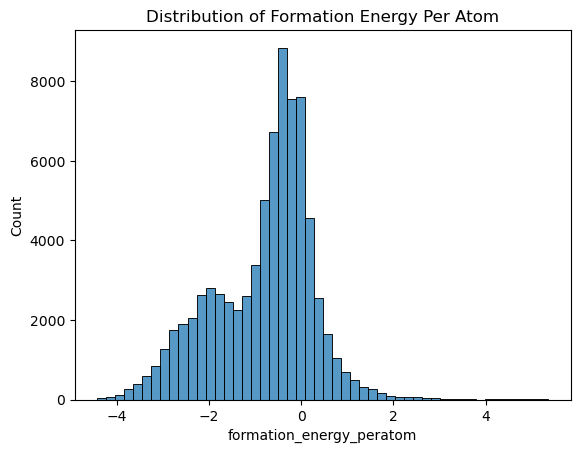

In [13]:
# plot distribution of formation energy per atom
sns.histplot(df['formation_energy_peratom'], bins=50)
plt.title('Distribution of Formation Energy Per Atom')
plt.show()

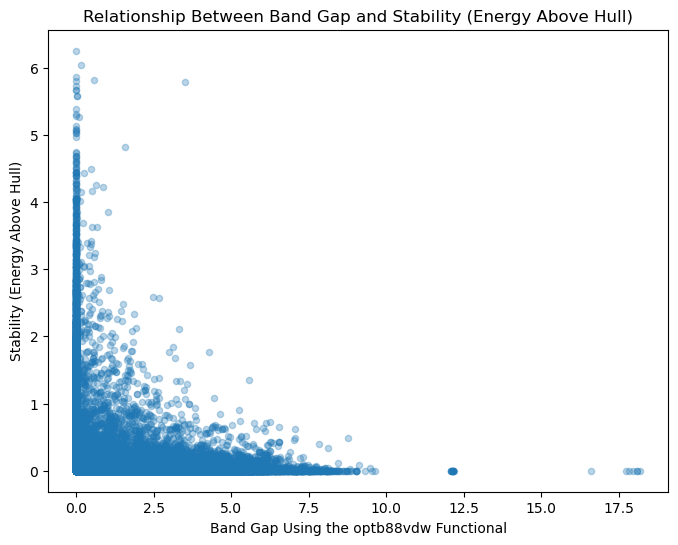

In [15]:
# Scatter plot for band gap vs energy above hull
plt.figure(figsize=(8, 6))
plt.scatter(df['optb88vdw_bandgap'], df['ehull'], alpha=0.3, s=20)
plt.title('Relationship Between Band Gap and Stability (Energy Above Hull)')
plt.xlabel('Band Gap Using the optb88vdw Functional')
plt.ylabel('Stability (Energy Above Hull)')
plt.show()

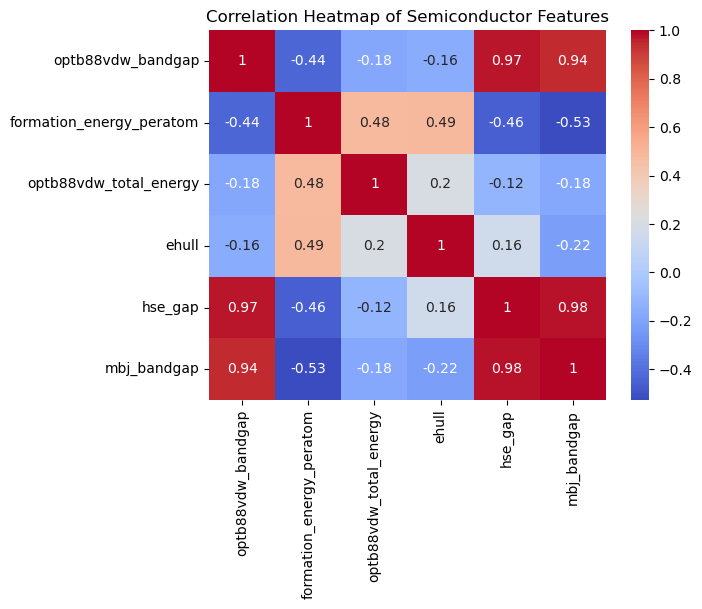

In [16]:
# Heatmap of semiconductor relavent features
cols = ['optb88vdw_bandgap', 'formation_energy_peratom', 'optb88vdw_total_energy', 'ehull', 'hse_gap', 'mbj_bandgap']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Semiconductor Features')
plt.show()

In [17]:
# load all six filtered csv files of semiconductors and transparent semiconductors for the three different DFT functionals (optb88vdw, MBJ, and HSE)
files = {'semis_vdw': pd.read_csv('semis_vdw.csv'),
         'semis_mbj': pd.read_csv('semis_mbj.csv'),
         'semis_hse': pd.read_csv('semis_hse.csv'),
         'transparent_semis_vdw': pd.read_csv('transparent_semis_vdw.csv'),
         'transparent_semis_mbj': pd.read_csv('transparent_semis_mbj.csv'),
         'transparent_semis_hse': pd.read_csv('transparent_semis_hse.csv')}

for name, dataframe in files.items():
    print(f'File name is {name} and has length of {len(dataframe)} rows')
         

File name is semis_vdw and has length of 8520 rows
File name is semis_mbj and has length of 2828 rows
File name is semis_hse and has length of 12 rows
File name is transparent_semis_vdw and has length of 3185 rows
File name is transparent_semis_mbj and has length of 1879 rows
File name is transparent_semis_hse and has length of 10 rows


/var/folders/s8/2hb9crtx0f59zm5tv6jsyvhm0000gn/T/ipykernel_2002/37873021.py:2: DtypeWarning: Columns (13,16,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  files = {'semis_vdw': pd.read_csv('semis_vdw.csv'),
